In [33]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import random

Используем один из "игрушечных" датасетов из той же библиотеки.

In [2]:
from sklearn.datasets import load_diabetes

In [97]:
X, y = load_diabetes(return_X_y=True)

Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [98]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [99]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [100]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y-z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z-y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [101]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [142]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # idx = [random.randint(0, len(X_train)-1) for i in range(int(len(X_train)/2))]

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            # tree.fit(X_train[idx], y_train[idx])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [143]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [144]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [145]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1047.170696748869
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4462.841446773047


Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [146]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [147]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    print('trees=', n_trees, ', max depth=', max_depth)
    plt.show()

trees= 10 , max depth= 3


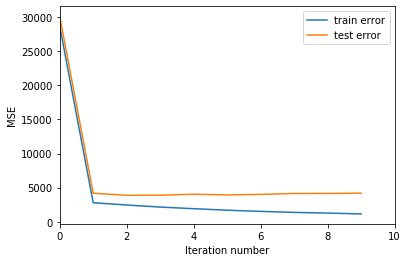

In [148]:
get_error_plot(n_trees, train_errors, test_errors)

trees= 1 , max depth= 1


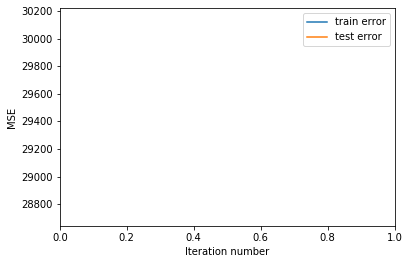

trees= 1 , max depth= 2


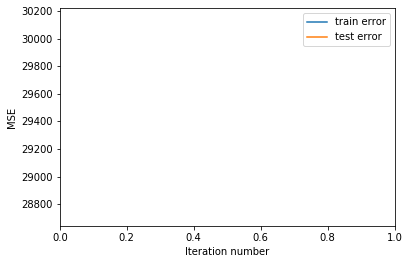

trees= 1 , max depth= 3


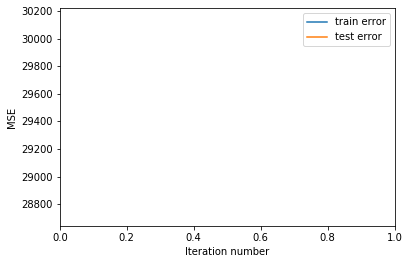

trees= 1 , max depth= 4


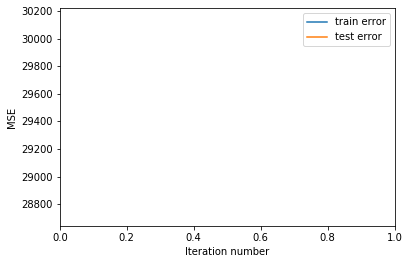

trees= 1 , max depth= 5


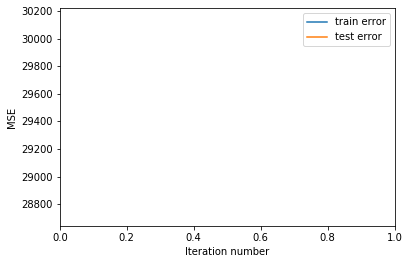

trees= 1 , max depth= 6


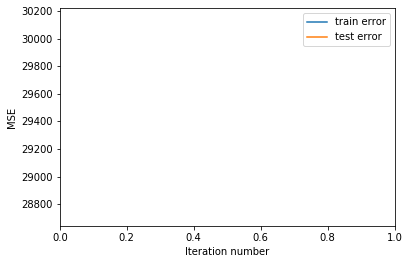

trees= 1 , max depth= 7


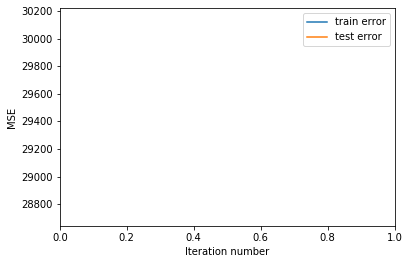

trees= 1 , max depth= 8


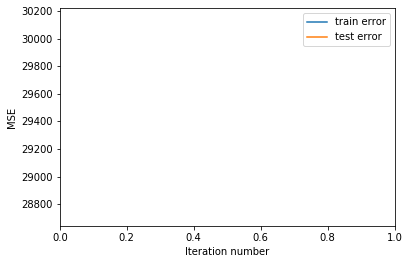

trees= 1 , max depth= 9


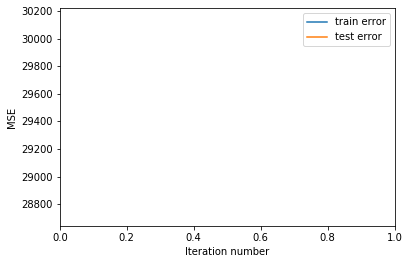

trees= 1 , max depth= 10


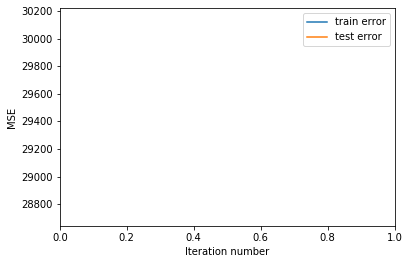

trees= 2 , max depth= 1


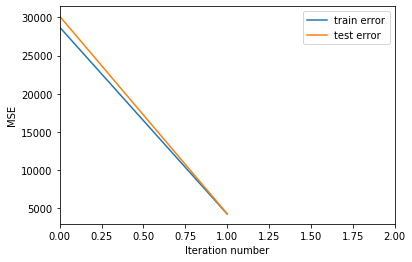

trees= 2 , max depth= 2


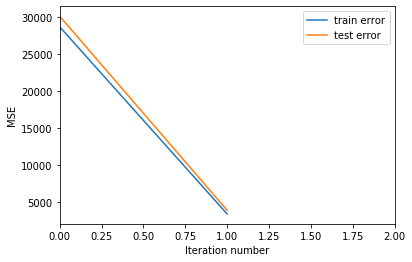

trees= 2 , max depth= 3


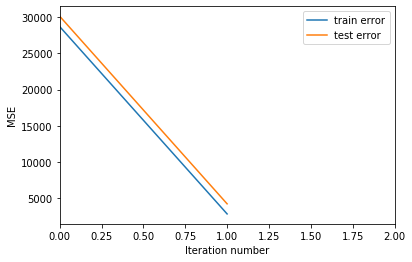

trees= 2 , max depth= 4


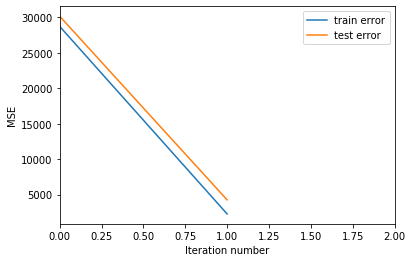

trees= 2 , max depth= 5


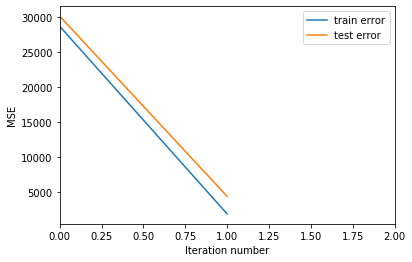

trees= 2 , max depth= 6


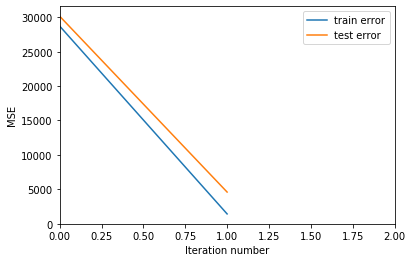

trees= 2 , max depth= 7


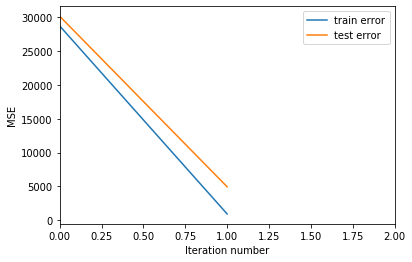

trees= 2 , max depth= 8


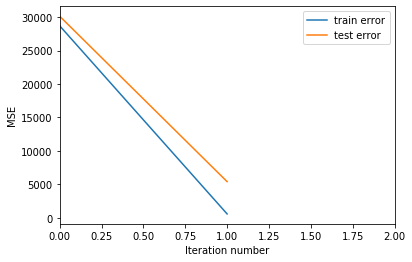

trees= 2 , max depth= 9


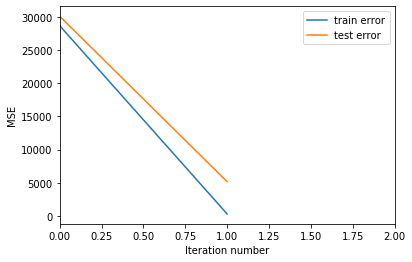

trees= 2 , max depth= 10


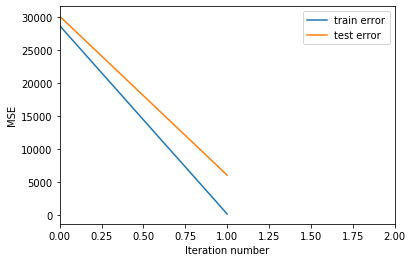

trees= 3 , max depth= 1


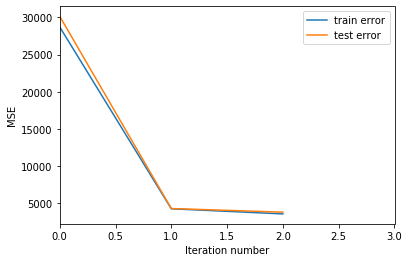

trees= 3 , max depth= 2


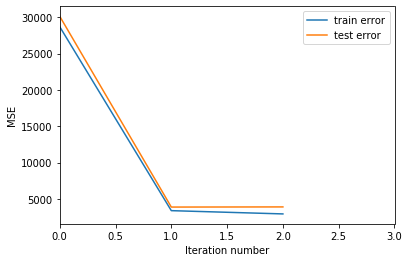

trees= 3 , max depth= 3


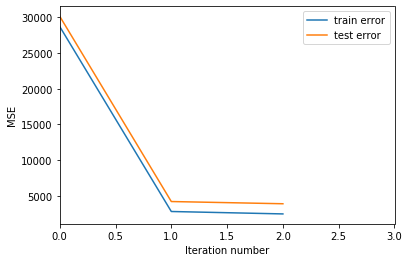

trees= 3 , max depth= 4


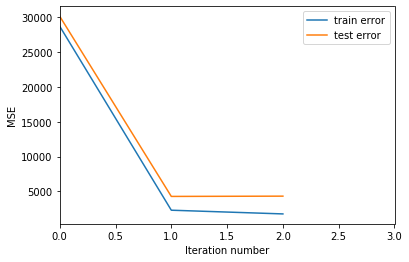

trees= 3 , max depth= 5


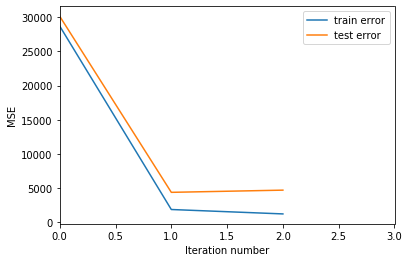

trees= 3 , max depth= 6


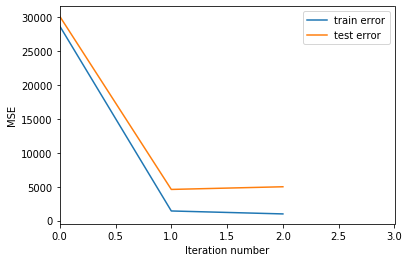

trees= 3 , max depth= 7


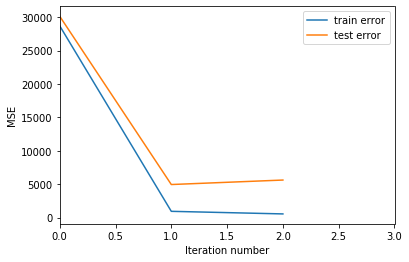

trees= 3 , max depth= 8


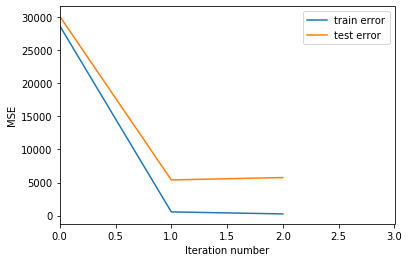

trees= 3 , max depth= 9


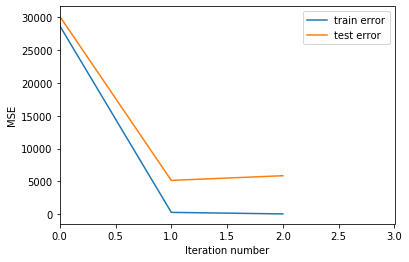

trees= 3 , max depth= 10


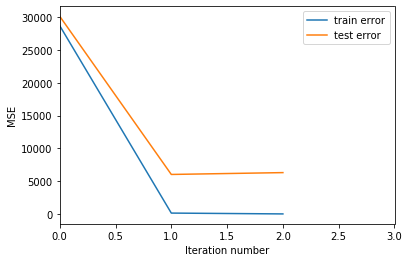

trees= 4 , max depth= 1


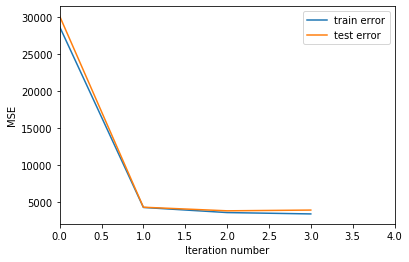

trees= 4 , max depth= 2


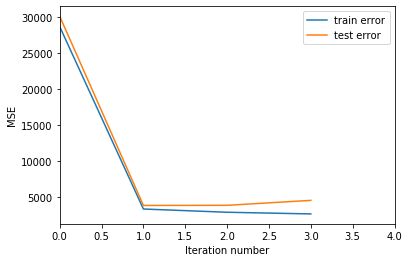

trees= 4 , max depth= 3


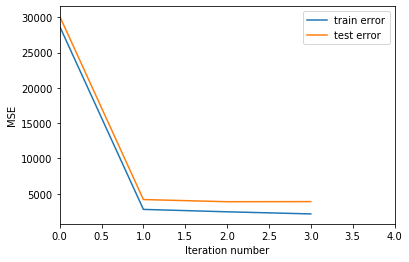

trees= 4 , max depth= 4


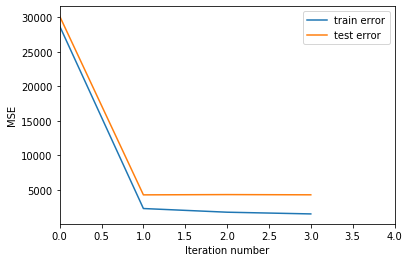

trees= 4 , max depth= 5


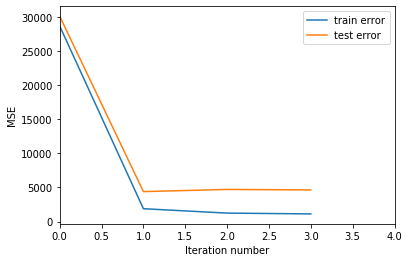

trees= 4 , max depth= 6


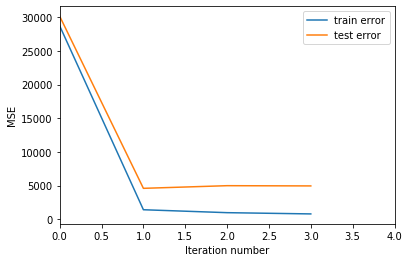

trees= 4 , max depth= 7


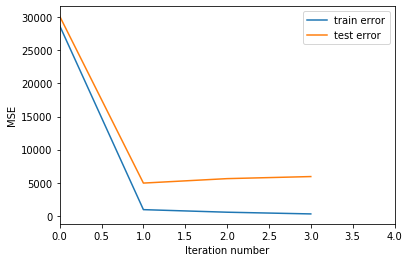

trees= 4 , max depth= 8


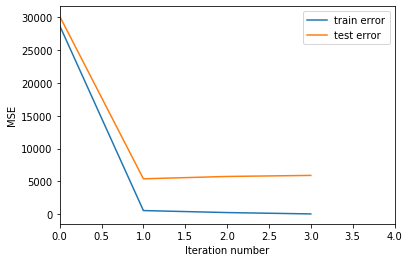

trees= 4 , max depth= 9


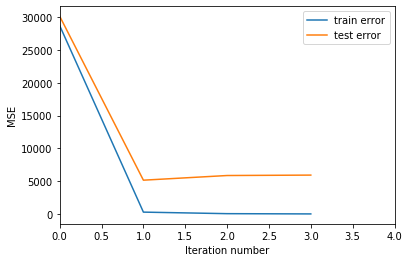

trees= 4 , max depth= 10


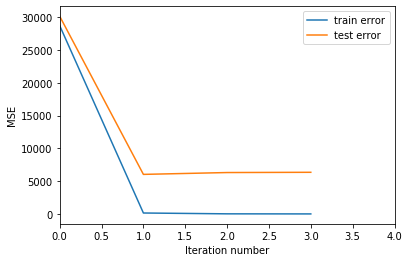

trees= 5 , max depth= 1


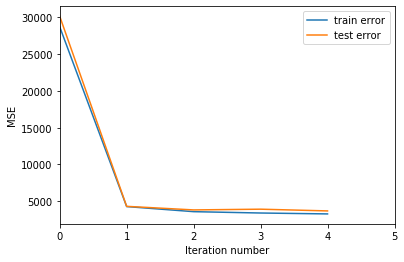

trees= 5 , max depth= 2


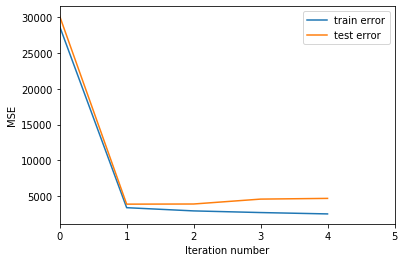

trees= 5 , max depth= 3


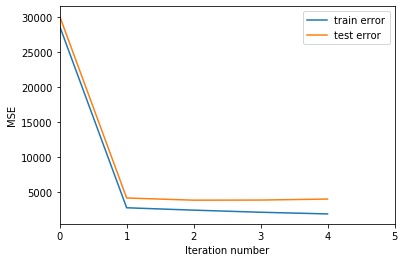

trees= 5 , max depth= 4


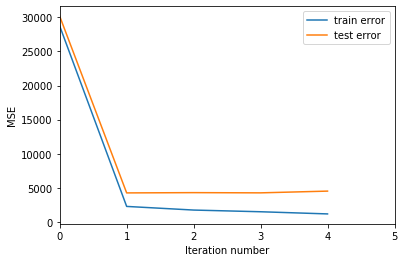

trees= 5 , max depth= 5


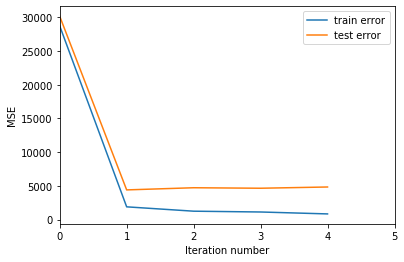

trees= 5 , max depth= 6


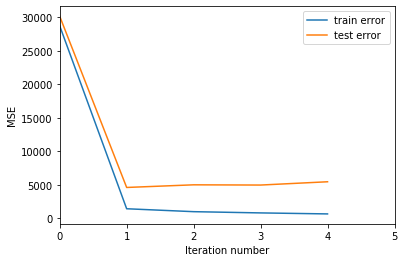

trees= 5 , max depth= 7


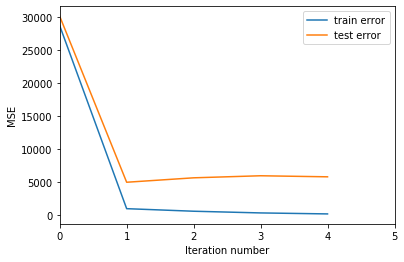

trees= 5 , max depth= 8


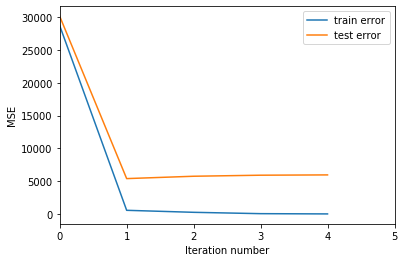

trees= 5 , max depth= 9


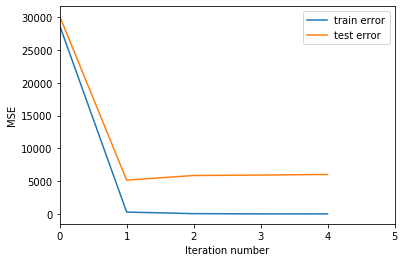

trees= 5 , max depth= 10


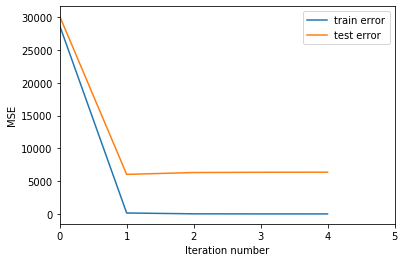

trees= 6 , max depth= 1


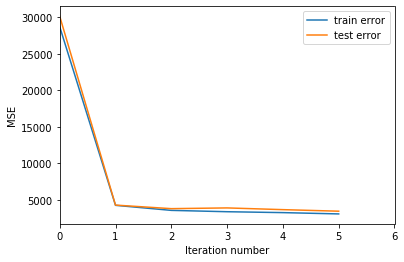

trees= 6 , max depth= 2


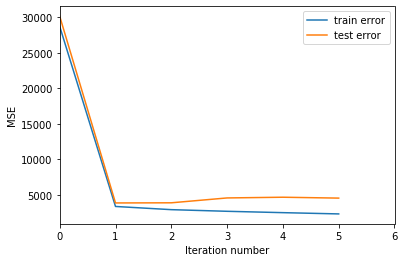

trees= 6 , max depth= 3


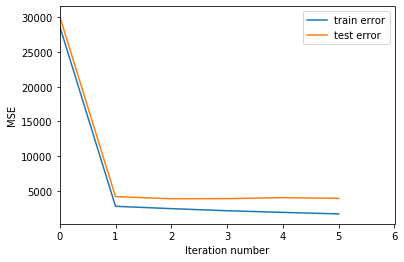

trees= 6 , max depth= 4


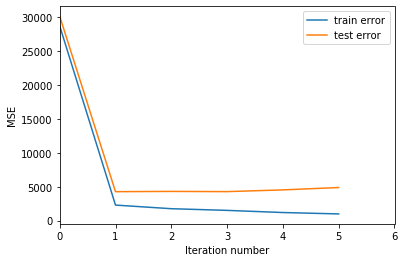

trees= 6 , max depth= 5


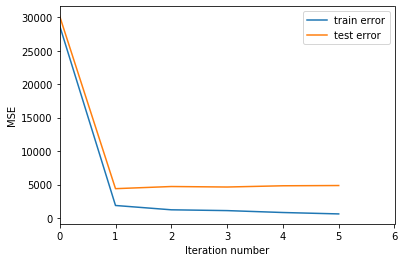

trees= 6 , max depth= 6


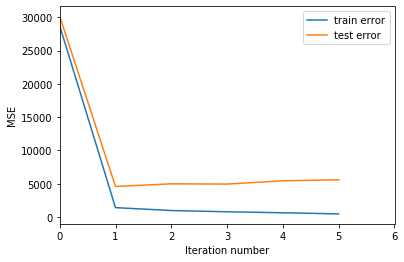

trees= 6 , max depth= 7


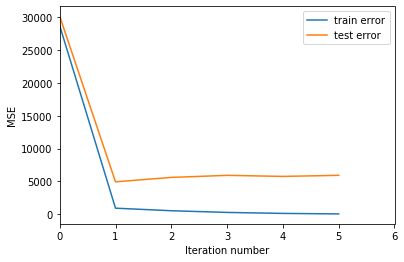

trees= 6 , max depth= 8


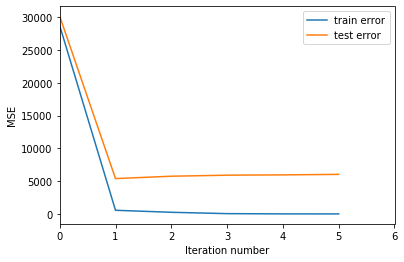

trees= 6 , max depth= 9


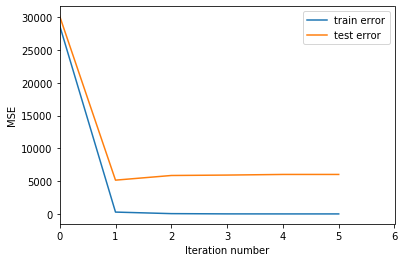

trees= 6 , max depth= 10


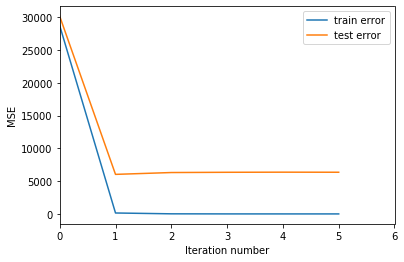

trees= 7 , max depth= 1


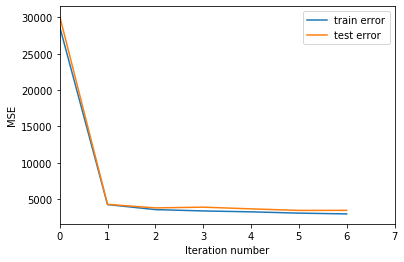

trees= 7 , max depth= 2


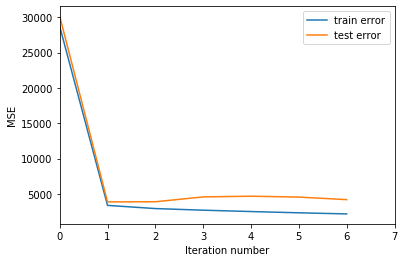

trees= 7 , max depth= 3


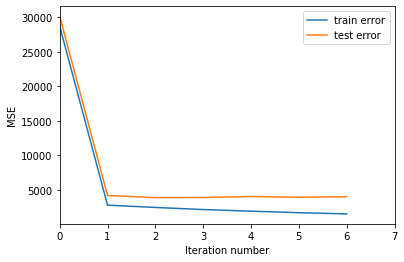

trees= 7 , max depth= 4


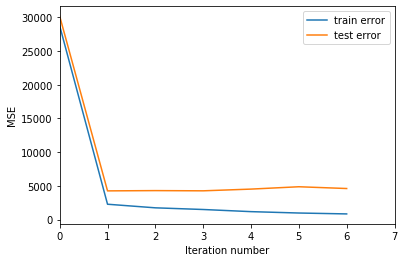

trees= 7 , max depth= 5


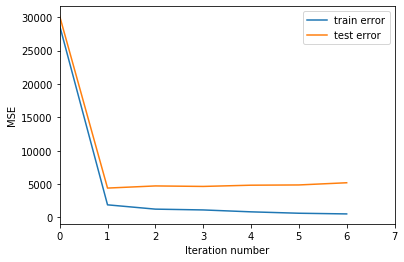

trees= 7 , max depth= 6


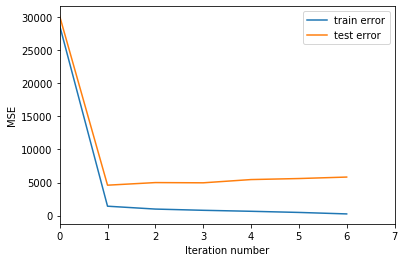

trees= 7 , max depth= 7


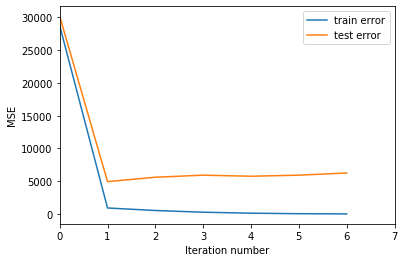

trees= 7 , max depth= 8


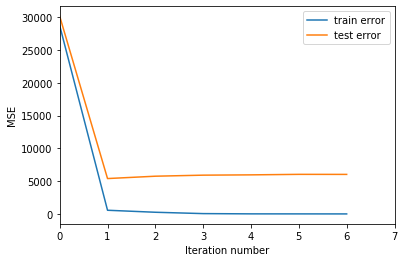

trees= 7 , max depth= 9


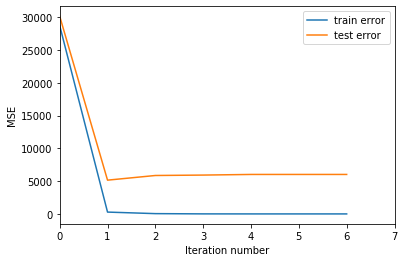

trees= 7 , max depth= 10


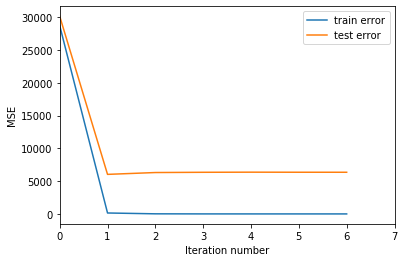

trees= 8 , max depth= 1


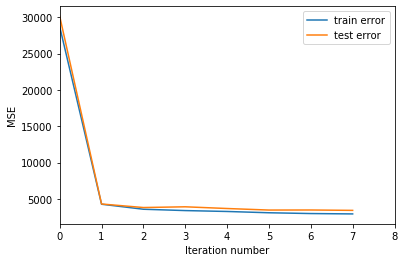

trees= 8 , max depth= 2


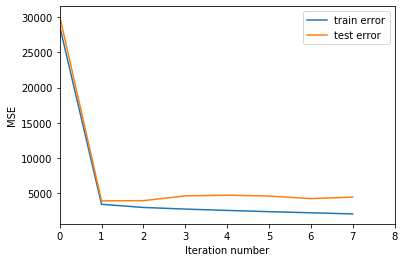

trees= 8 , max depth= 3


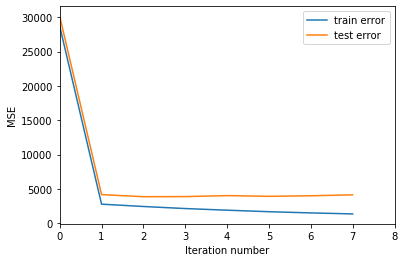

trees= 8 , max depth= 4


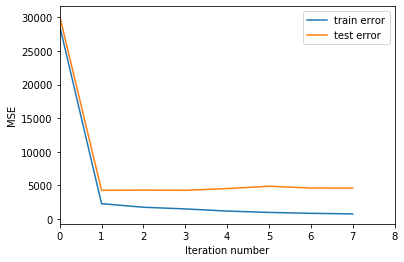

trees= 8 , max depth= 5


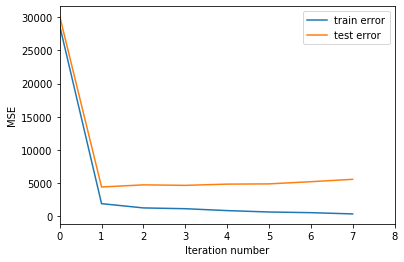

trees= 8 , max depth= 6


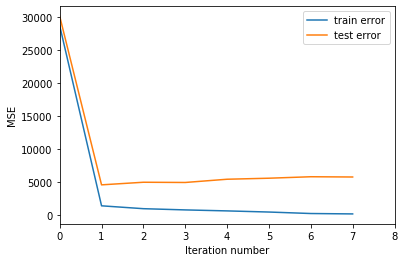

trees= 8 , max depth= 7


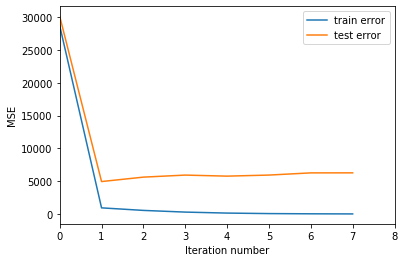

trees= 8 , max depth= 8


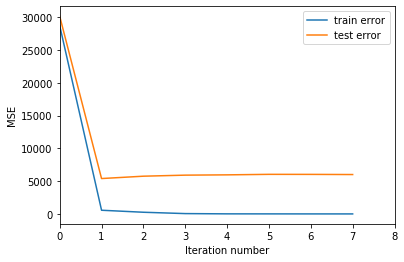

trees= 8 , max depth= 9


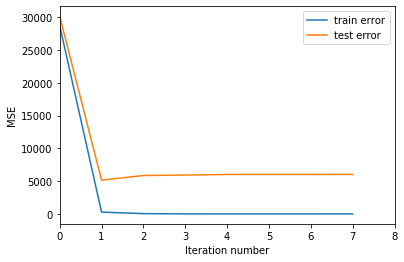

trees= 8 , max depth= 10


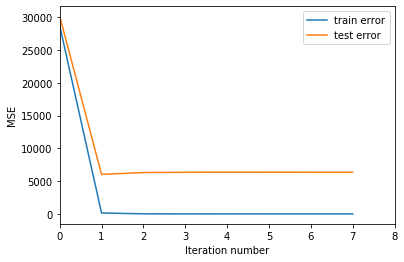

trees= 9 , max depth= 1


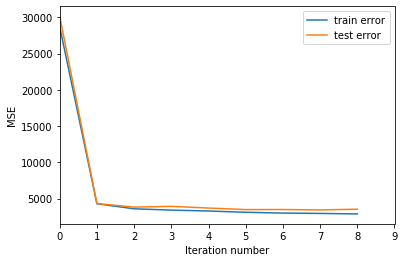

trees= 9 , max depth= 2


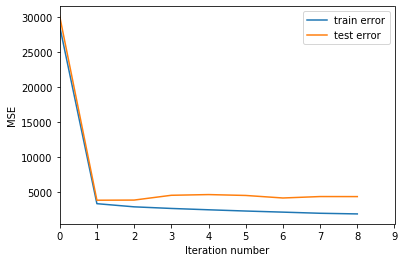

trees= 9 , max depth= 3


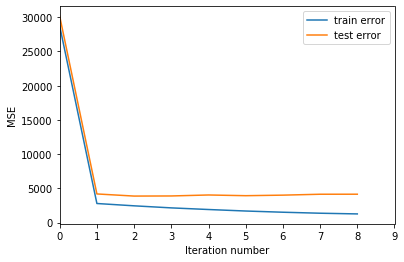

trees= 9 , max depth= 4


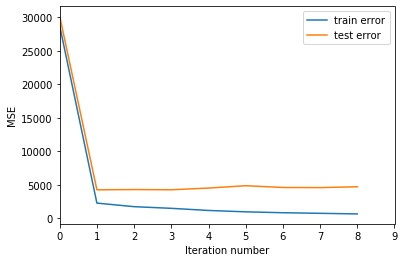

trees= 9 , max depth= 5


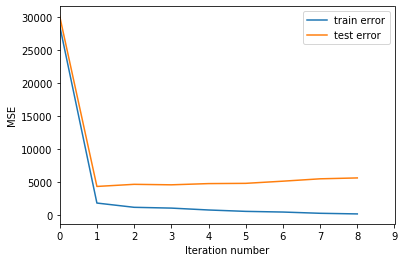

trees= 9 , max depth= 6


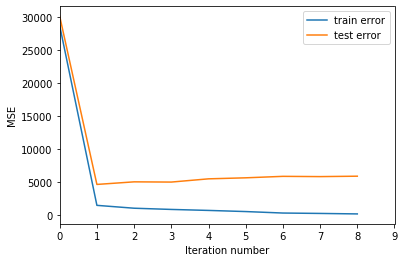

trees= 9 , max depth= 7


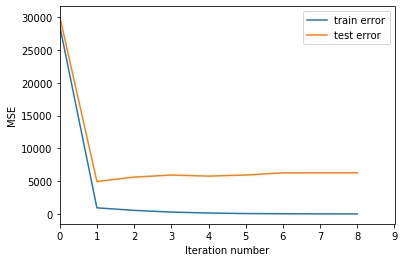

trees= 9 , max depth= 8


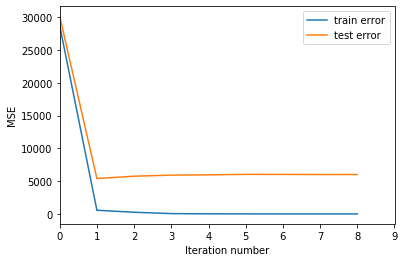

trees= 9 , max depth= 9


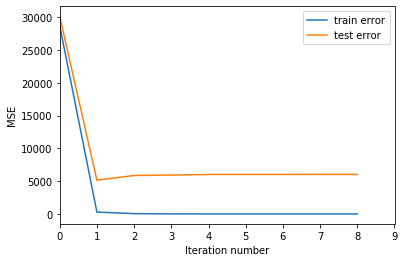

trees= 9 , max depth= 10


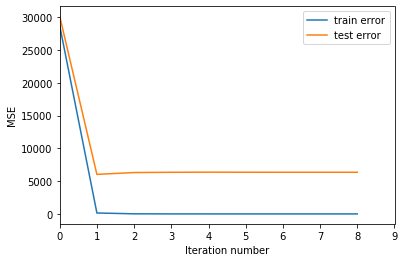

trees= 10 , max depth= 1


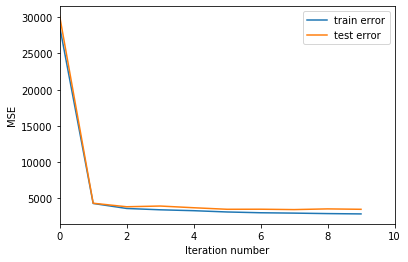

trees= 10 , max depth= 2


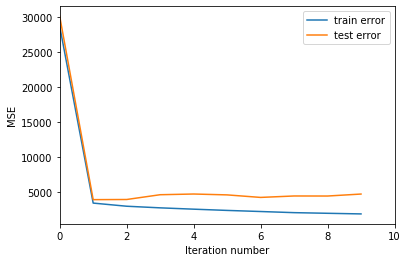

trees= 10 , max depth= 3


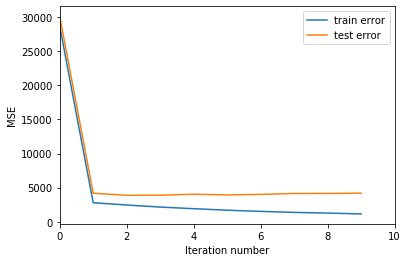

trees= 10 , max depth= 4


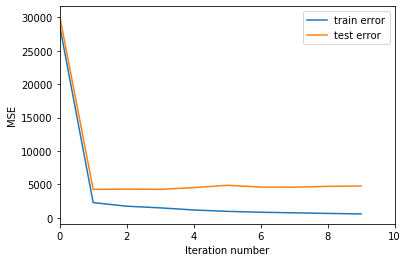

trees= 10 , max depth= 5


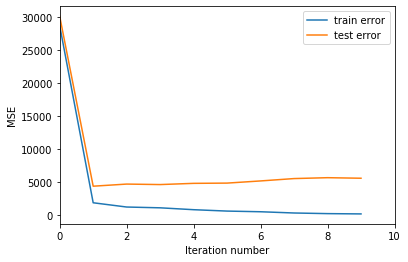

trees= 10 , max depth= 6


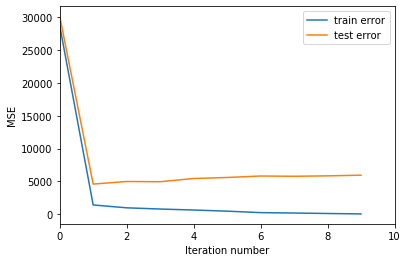

trees= 10 , max depth= 7


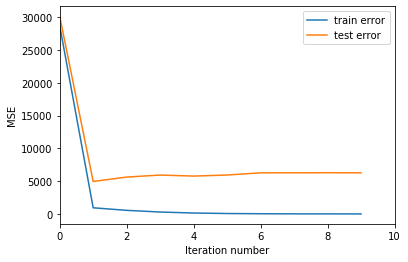

trees= 10 , max depth= 8


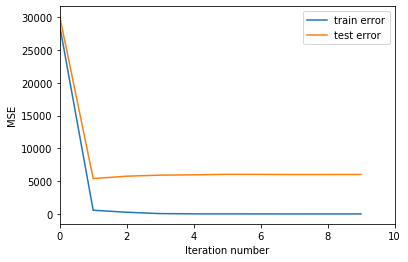

trees= 10 , max depth= 9


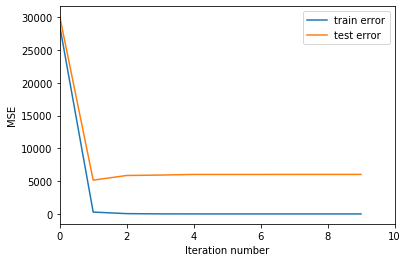

trees= 10 , max depth= 10


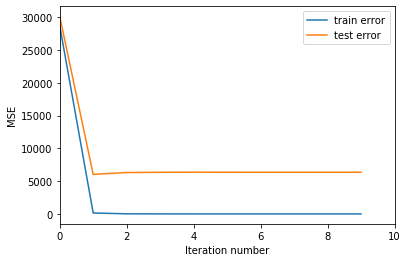

In [150]:
for n_trees in range(1, 11):
    for max_depth in range(1, 11):
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        get_error_plot(n_trees, train_errors, test_errors)

C увеличением количества деревьев ошибка падает.
С увеличением глубины на малом количесвте деревьев происходит быстрое переобучение модели.
